## Labo Week 5 : Lineaire Modellen en Decision Trees

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Oefening 1** : **Binaire Classificatie - cijfers data**

De taak is om op basis van 2 examenresultaten van studenten te gaan voorspellen of ze toegelaten zullen worden om in te schrijven voor een bepaalde cursus. 

**1.1** Lees de txt file : cijfers.txt in via pandas. Zorg ervoor dat je tabel de volgende kolomhoofden heeft : 'Examen1', 'Examen2', 'Toegelaten'. 

In [2]:
cijfers = pd.read_csv("cijfers.txt", header=None, names=["Examen1","Examen2", "Toegelaten"])
cijfers.head()

,Examen1,Examen2,Toegelaten
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


**1.2** Visualiseer deze data door een scatterplot te maken van de aanwezige data. Geef elke klasse een andere kleur. Feature 1= 'Examen1' plaats je op de x-as, Feature 2 = 'Examen 2' plaats je op de y-as.

C:\Users\User\AppData\Local\Temp\ipykernel_10404\1461449583.py:3: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("geslaagd", "niet geslaagd")


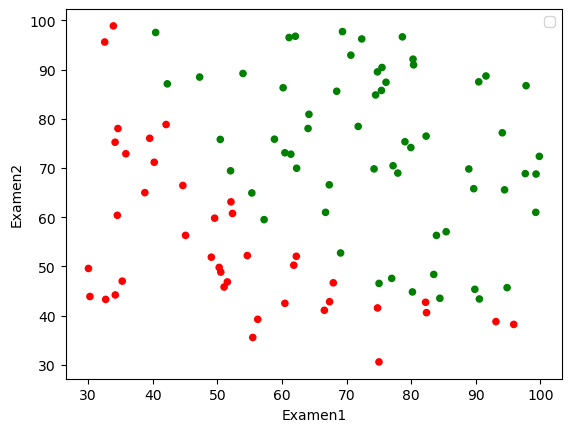

In [3]:
#'red' if cijfers["Toegelaten"]==1 else 'green'
cijfers.plot.scatter('Examen1','Examen2',color=cijfers['Toegelaten'].apply(lambda x: "green" if x==1 else "red"))
plt.legend("geslaagd", "niet geslaagd")

**1.3** Stel enerzijds een model op via LogisticRegression, anderzijds via een DecisionTreeClassifier. Splits je data telkens in een trainings en testset ($25\%$ van de data hou je om de testen). Plot de  **decision boundary** die je bekomt bovenop je scatterplot.

1)Je lineair model zal 2 coëfficienten weergeven ($a_1$ en $a_2$ want er zijn 2 features aanwezig) en een intercept($a_0$). Deze kan je opvragen via  

```
model.coef_[0]
model.intercept_[0]
```

De vergelijking van je decision boundary verkrijg je als volgt :

\begin{equation}
0 = a_0 + a_1 * x_1 + a_2x_2 \\
x_2 = - \frac{a_0 + a_1 * x_1}{a_2}\\
\end{equation}
$x_2$ stelt feature 2 voor en bevindt zich op de y-as, $x_1$ stelt feature 1 voor en bevindt zich op de x-as, dus de vergelijking van de rechte heeft volgende vorm : 
\begin{equation} 
y  =  - \frac{a_0 + a_1 * x}{a_2}
\end{equation}

2)De decision boundary van je beslissingsboom kan je als volgt bepalen : doe een voorspelling voor elke (x,y) coördinaat van een grid die de volledige grafiek bedekt. 
Deze grid kan je genereren met de  $𝑛𝑝.𝑚𝑔𝑟𝑖𝑑()$  functie als volgt :

```
grid = np.mgrid[30:100,20:100].reshape(2,-1).T
```

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(cijfers[['Examen1','Examen2']],cijfers['Toegelaten'],random_state=0, test_size=0.75, stratify=cijfers['Toegelaten'])

In [5]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_Train, Y_Train)
lin = LogisticRegression(C=0.9)
lin.fit(X_Train, Y_Train)
pass

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[[0.18403326 0.34970622]]
[-31.48043313]


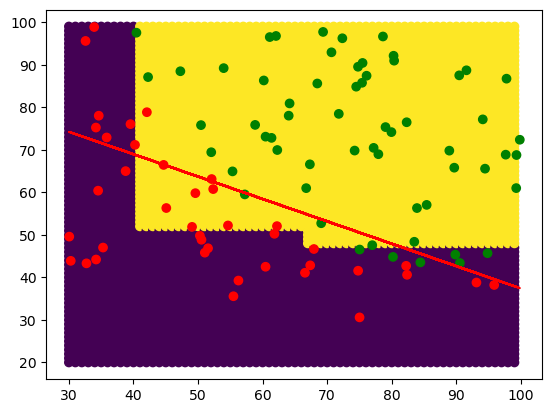

In [6]:
fig, ax = plt.subplots(1)
grid = np.mgrid[30:100,20:100].reshape(2,-1).T
pred = tree.predict(grid)
ax.scatter(grid[:, 0], grid[:,1],c=pred==1)
ax.scatter(cijfers['Examen1'],cijfers['Examen2'],color=cijfers['Toegelaten'].apply(lambda x: "green" if x==1 else "red"))
decision_boundary_lin = (-(lin.coef_[0][0] * cijfers['Examen1'] + lin.intercept_[0])/lin.coef_[0][1]).to_list()
plt.plot(cijfers['Examen1'],decision_boundary_lin,color='red')

print(lin.coef_)
print(lin.intercept_)

**1.4** Varieer de parameters van beide modellen en bekijk de wijzigingen visueel via de decision boundaries.

1)Voor het lineair model de varieer de $C$ regularisatie parameter.

2)Voor de beslissingsboom, varieer de max_depth van waarden $k=1$ t.e.m. $k=7$. Kan je de decision boundaries die je bekomt verklaren?

* Om beide modellen te vergelijken : zie ROC_curve volgend labo

### **Oefening 2** : **Classificatie - housing-data**

**2.1 De data verkennen**

Gegeven de dataset van housing.csv. Deze dataset kan worden gebruikt om te voorspellen of een appartement in New York gelegen is of in San Fransisco. Het bestand bevat volgende kolommen:
 * in_sf: het te voorspellen target: staat op 1 indien het appartement in San Francisco gelegen is
 * beds: het aantal bedden
 * bath: het aantal baden
 * price: de verkoopprijs (\$)
 * year_built: het bouwjaar
 * sqft: de oppervlakte in square foot
 * price_per_sqft: de prijs (\$) per square foot
 * elevation: hoogte in m

1. Laad de data in in een Pandas-dataframe (gelieve niks te veranderen aan het csv-bestand, tip: skip de eerste 2 rijen) en maak een scatter_matrix-plot van de __features__ waarbij elke instanties steeds ingekleurd wordt volgens zijn target (met colormap 'brg' wordt San Francisco groen en New York blauw)
 
2. Teken met Pandas (groupby en hist(alpha=0.4)) een histogram (met verschillende kleur voor SF en NY) voor een aantal features waarvan je verwacht dat de spreiding voor de 2 steden sterk verschilt.
 

In [7]:
housing = pd.read_csv('housing.csv',skiprows=2)
housing.head()

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


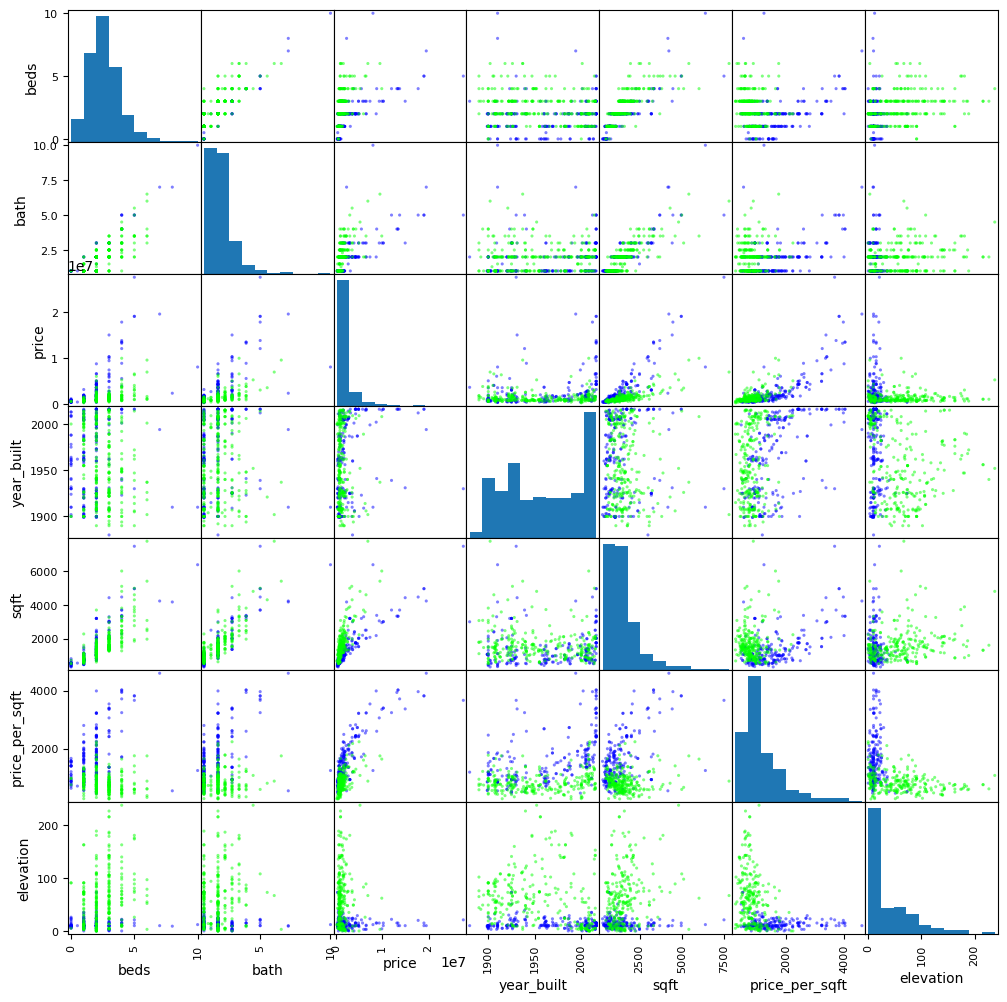

In [8]:
pd.plotting.scatter_matrix(housing.iloc[:,1:], cmap='brg',c=housing['in_sf'],s=20,figsize=(12,12))
plt.show()

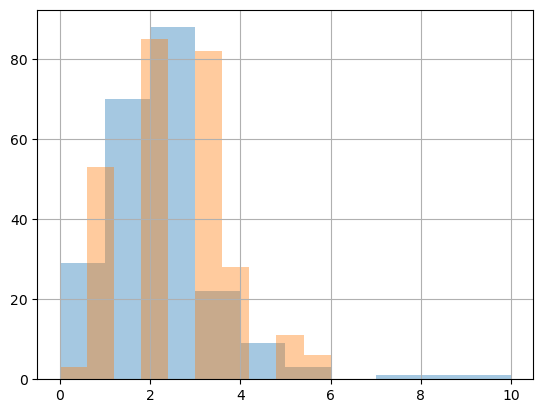

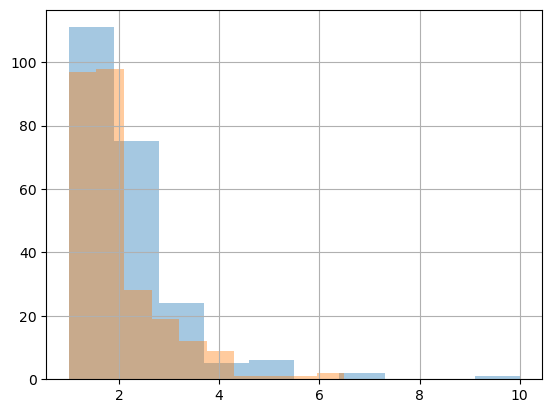

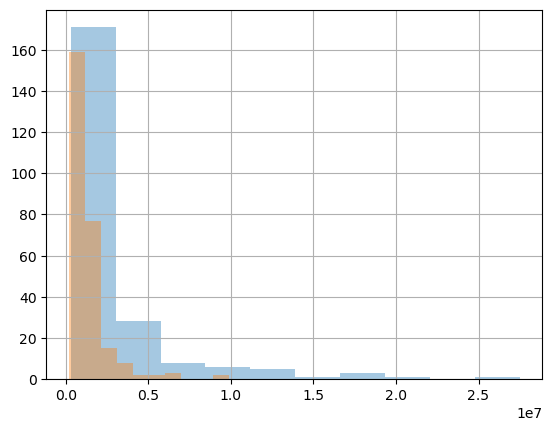

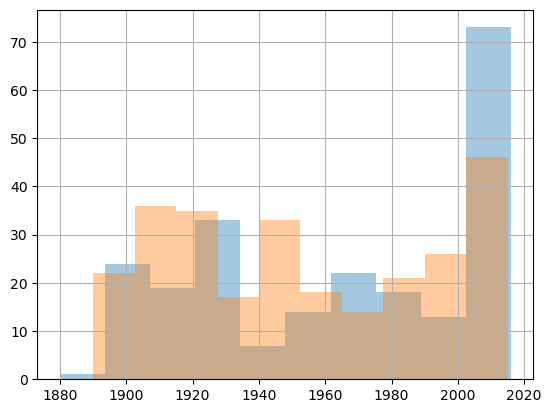

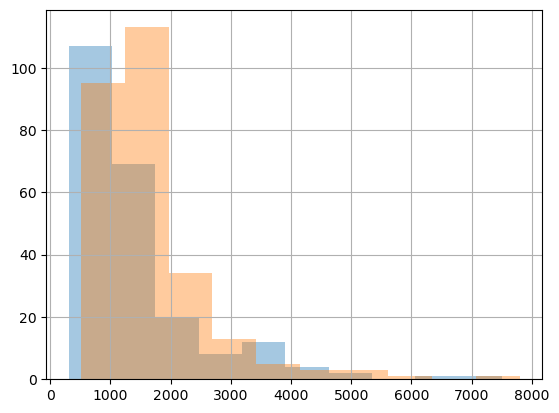

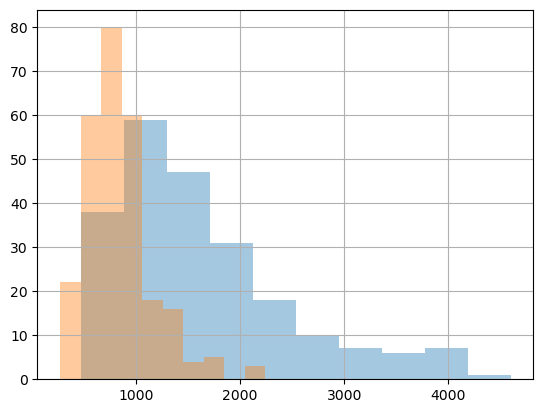

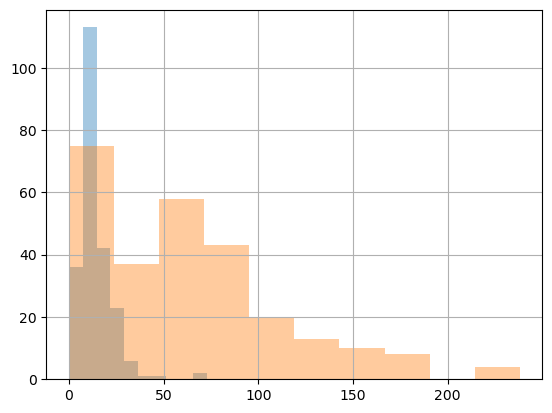

In [9]:
# Teken met Pandas (groupby en hist(alpha=0.4)) een histogram (met verschillende kleur voor SF en NY)
# voor een aantal features waarvan je verwacht dat de spreiding voor de 2 steden sterk verschilt.
#print(housing.columns[1:])
#housing.groupby('in_sf').elevation.hist(alpha=0.4)
for col in housing.columns[1:]:
    housing.groupby('in_sf')[col].hist(alpha=0.4)
    plt.show()

 
 
 #### **2.2 Plotten van de boom met ideale diepte**

 * Deel de data in in een trainingset en een test set (70%/30%) 
 * Schrijf een script dat de ideale diepte zoekt van de decision tree 
 * Plot de tree die je bekomt ofwel via `plot_tree` van matplotlib  
 

In [10]:
X = housing.iloc[:,1:]
Y = housing.iloc[:,0]
X_Trainval, X_Test, Y_Trainval, Y_Test = train_test_split(X,Y)
X_Train, X_Val, Y_Train, Y_Val = train_test_split(X_Trainval, Y_Trainval)

In [11]:
from sklearn.tree import DecisionTreeClassifier

best_score = 0

# make a grid for parameter tuning
for depth in [1,2,3,4,5,6,7]:
    for rs in [0,5,10,20,40]:
    # for each combination of parameters train a decisiontree
        tree = DecisionTreeClassifier(max_depth=depth, random_state=rs)
        tree.fit(X_Train, Y_Train)
        # evaluate for the validation set
        score = tree.score(X_Val, Y_Val)
        # store the best scores
        if score > best_score:
            best_score = score
            best_parameters = {'max_depth': depth, 'random_state': rs}

print("Best parameters: ", best_parameters)
print('Best score', best_score)

Best parameters:  {'max_depth': 3, 'random_state': 0}
Best score 0.8924731182795699


In [12]:
model = DecisionTreeClassifier(**best_parameters)
model.fit(X_Trainval, Y_Trainval)
print(model.score(X_Test, Y_Test))

0.8617886178861789


     beds  bath    price  year_built  sqft  price_per_sqft  elevation
0     2.0   1.0   999000        1960  1000             999         10
1     2.0   2.0  2750000        2006  1418            1939          0
2     2.0   2.0  1350000        1900  2150             628          9
3     1.0   1.0   629000        1903   500            1258          9
4     0.0   1.0   439000        1930   500             878         10
..    ...   ...      ...         ...   ...             ...        ...
487   5.0   2.5  1800000        1890  3073             586         76
488   2.0   1.0   695000        1923  1045             665        106
489   3.0   2.0  1650000        1922  1483            1113        106
490   1.0   1.0   649000        1983   850             764        163
491   3.0   2.0   995000        1956  1305             762        216

[492 rows x 7 columns]


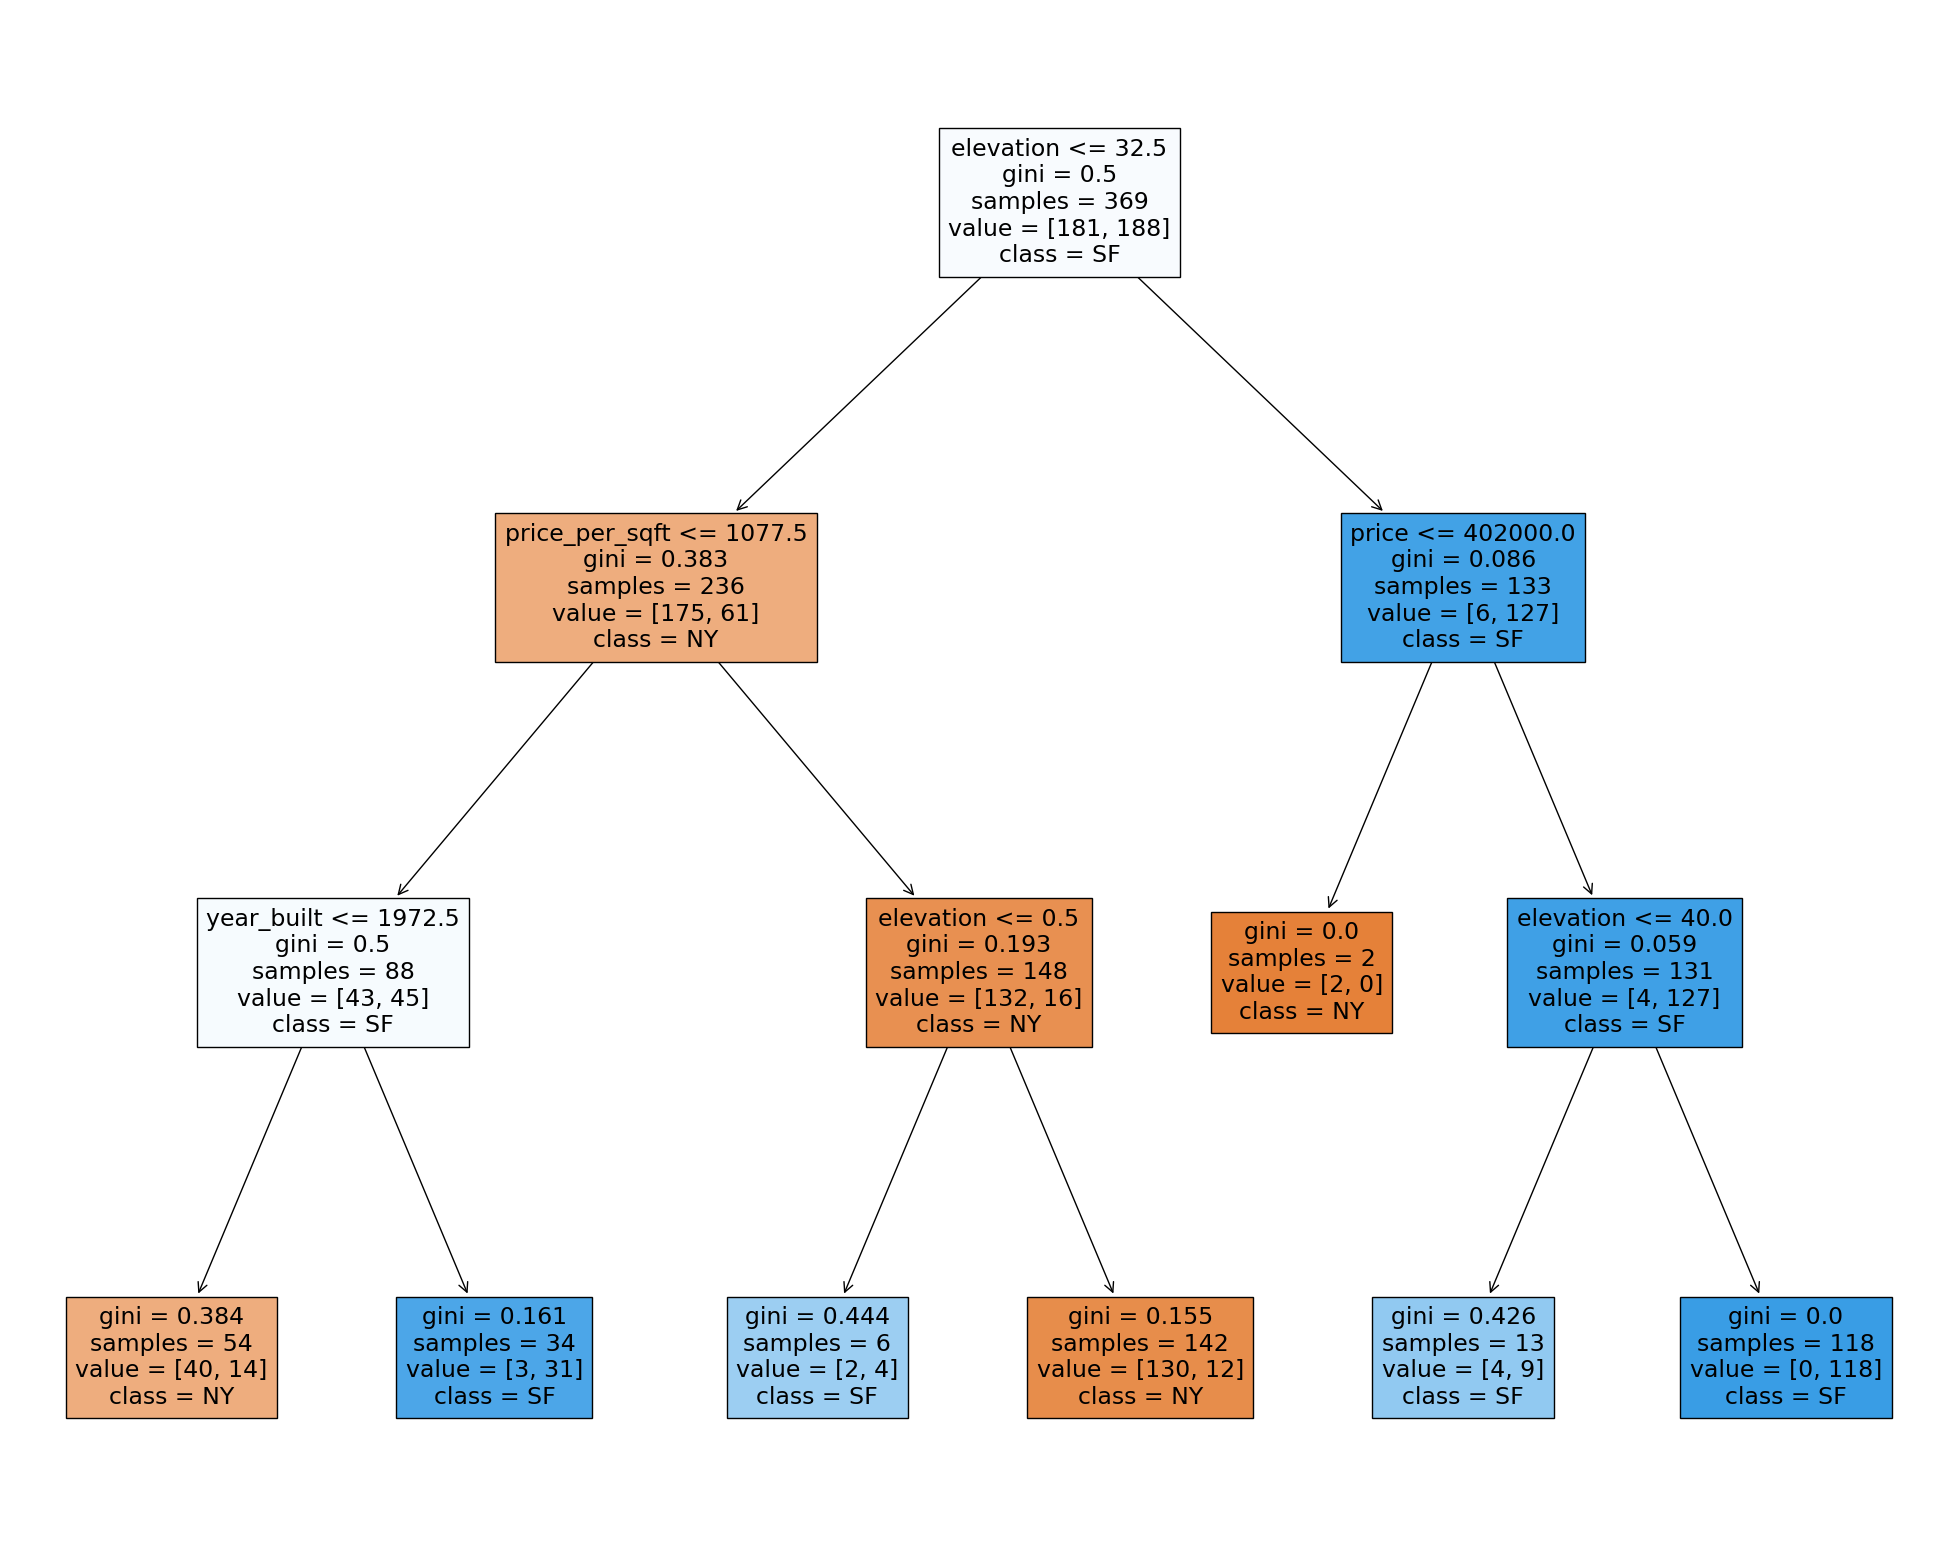

In [13]:
import sklearn
fig = plt.figure(figsize=(25,20))
print(X)
_ = sklearn.tree.plot_tree(model, 
                   feature_names=X.columns,  
                   class_names=['NY',"SF"],
                   filled=True)

#### **2.3** : **Gridsearch in combinatie met cross-validatie**
    

**2.3.1** Gebruik  DecisionTreeClassifier() maar nu in combinatie met **Cross-validatie** om de performantie van je model beter in te schatten. Vertrek van de default ingestelde parameterwaarden.
Gebruik volgende import: 
```
from sklearn.model_selection import cross_val_score of
from sklearn.model_selection import cross_validate
```

**2.3.2** Herhaal deze oefening maar nu in combinatie met **Leave-one out Cross-validation**. Gebruik nu :
```
from sklearn.model_selection import LeaveOneOut
```

**2.3.3** Gebruik naast training en testset nu ook een **validatieset**. Gebruik GridSearch en CV in combinatie via **GridSearchCV** om zowel de ideale diepte van de boom als de randomstate te onderzoeken. $\newline$
Maak hierbij gebruik van $5$ folds en beide imports :
```
from sklearn.model_selection import GridSearchCV ## training & validatie
from sklearn.model_selection import train_test_split ## 1 test set maken
```

Vergelijk je bekomen resultaten telkens met de vorige behaalde resultaten. Vergelijk niet alleen op basis van gemiddelde train en test scores maar ook op basis van tijd. Gebruik hiertoe de resultaten uit de functie **cross\_validate** uit $sklearn.model\_selection$ of gewoon een timer functie uit : 
```
from time import perf_counter as time
```

**2.3.1 Standaard Cross-validation : cross\_val\_score en cross\_validate**

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut
df = pd.DataFrame(cross_validate(model, X,Y))
print(df['test_score'].mean())
df

0.8435168006596578


,fit_time,score_time,test_score
0,0.006994,0.002001,0.767677
1,0.002998,0.001999,0.909091
2,0.007002,0.008997,0.969388
3,0.010004,0.002999,0.775510
4,0.004003,0.005009,0.795918


**2.3.2 Leave-one out**

In [15]:
cv = LeaveOneOut()
df = pd.DataFrame(cross_validate(model, X,Y,cv=cv))
print(df['test_score'].mean())
df

0.8617886178861789


,fit_time,score_time,test_score
0,0.004002,0.002000,1.0
1,0.003001,0.005020,0.0
2,0.002999,0.001000,1.0
3,0.003000,0.002000,1.0
4,0.006008,0.001992,1.0
...,...,...,...
487,0.003000,0.001000,1.0
488,0.002000,0.002000,1.0
489,0.002000,0.002000,1.0
490,0.003000,0.001000,1.0


**2.3.3 GridSearchCV**

In [16]:
from sklearn.model_selection import GridSearchCV ## training & validatie
from sklearn.model_selection import train_test_split ## 1 test set maken
from time import perf_counter as time

param_grid = {'max_depth': [1,2,3,4,5], 'random_state': [0,5,10,20,40]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_Test, Y_Test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.93
Best parameters: {'max_depth': 5, 'random_state': 5}
Best cross-validation score: 0.87
Best estimator:
DecisionTreeClassifier(max_depth=5, random_state=5)


**Oefening 3** : **Regressie - auto data**

Gegeven een uitgebreidere versie van de autoverbruikdata met extra features : auto_extra.txt. De taak blijft nog steeds om de target _miles_per_gallon_ ($mpg$) te voorspellen.

Uit de oorspronkelijke beschrijving van de data set :

 "The data concerns city-cycle fuel consumption in miles per gallon,
    to be predicted in terms of 3 multivalued discrete and 5 continuous
    attributes." (Quinlan, 1993)
  Number of Instances: 398
  Number of Attributes: 9 including the class attribute
  Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

Lees de data in via volgend commando :

```
data = pd.read_table('auto_extra.txt', delim_whitespace=True)
```
**3.1** Inspecteer de data en merk op dat het type van de kolom _horsepower_ geen $float$ is zoals men zou verwachten. Waarom niet? Kan je dit herstellen?

In [17]:
df = pd.read_table('auto_extra.txt', delim_whitespace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   modelyear     398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [18]:
def isnumeric(x):
    try:
        return float(x)
    except:
        return 0
df['horsepower'] = df['horsepower'].apply(lambda x: isnumeric(x)) # convert ? values to 0
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   modelyear     398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


**3.2** Bereken de **correlatiematrix** van de features en ga op basis hiervan na welke features je zou meenemen.
Gebruik volgende tutorial om de correlatiematrix te berekenen en te plotten : <http://benalexkeen.com/correlation-in-python/>

C:\Users\User\AppData\Local\Temp\ipykernel_10404\650331358.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()
C:\Users\User\AppData\Local\Temp\ipykernel_10404\650331358.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


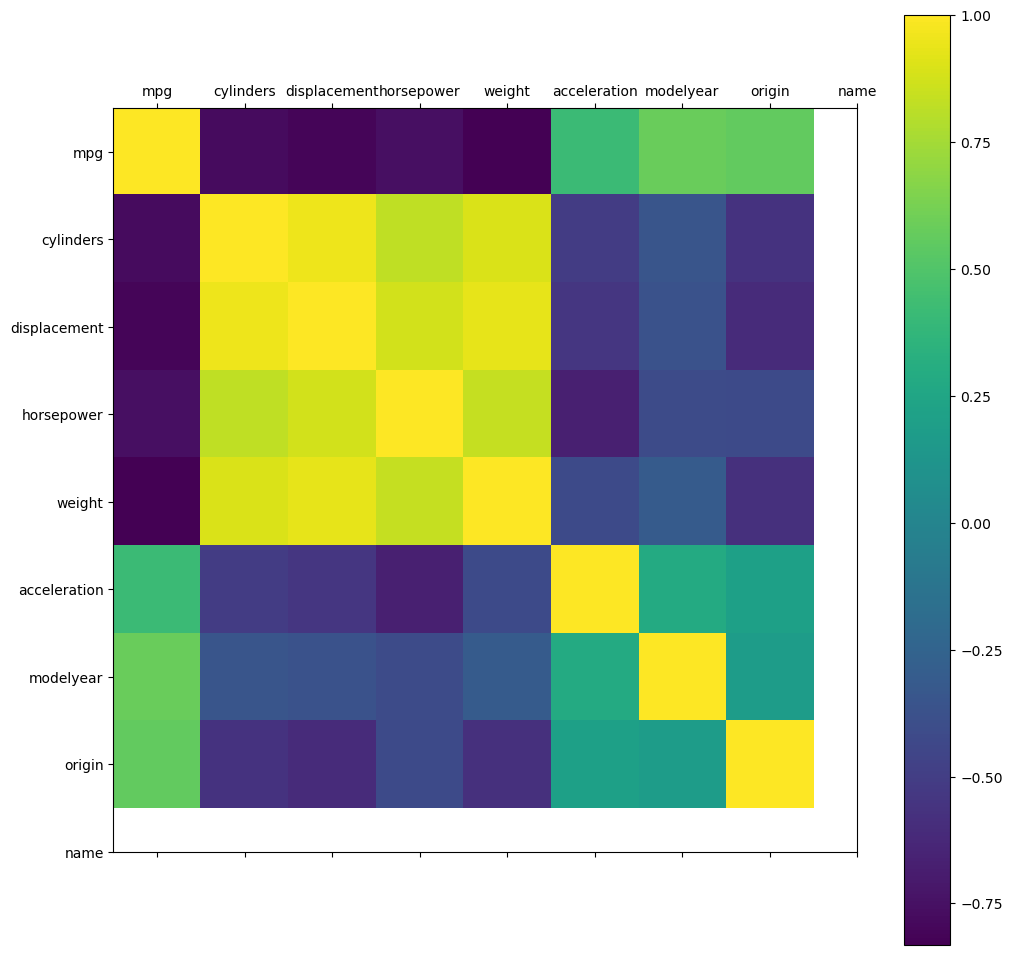

In [24]:
import matplotlib

matplotlib.rc('figure', figsize=(12, 12))
Y = df.iloc[:,0]
X = df.iloc[:,1:]
correlation = df.corr()
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.figsize=(12,12)
plt.show()

**3.3** Stel een regressiemodel op. Gebruik hierbij volgende features : "cylinders", "displacement", "horsepower", "weight" en "acceleration" . Test volgende algoritmen : 
- Lineair Regression, 
- Ridge, 
- Lasso, 
- Decision Trees en 
- Random Forest. 

Doe een grondige analyse van de parameters vooraleer je accuracy scores berekent en vergelijkt. Maak gebruik van cross_validatie.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
X = X[['cylinders','displacement','horsepower','weight','acceleration']]

classifiers = [LinearRegression, Ridge, Lasso, DecisionTreeRegressor, RandomForestRegressor]
param_grids = [
    {},    
    {
        'alpha':[0.01, 0.1, 0.5, 0.9], 'max_iter':[100000,10000,2000, 1000]
    },
    {
        'alpha':[0.01, 0.1, 0.5, 0.9], 'max_iter':[100000,10000,2000, 1000]
    },
    {
        'max_depth':list(range(7))
    },
    {
        'n_estimators': [10,20,50,100], 'max_depth':list(range(7)), 'max_features':list(range(len(X.columns)))
    }
]
best_params_list = []
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
for classifier,param_grid in zip(classifiers,param_grids):
    print(classifier)
    grid_search = GridSearchCV(classifier(), param_grid, cv=5, return_train_score=True)
    grid_search.fit(X_train, y_train)
    print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
    print("Best parameters: {}".format(grid_search.best_params_))
    best_params_list.append(grid_search.best_params_)
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
    print("Best estimator:\n{}".format(grid_search.best_estimator_))
    print("\n\n")

<class 'sklearn.linear_model._base.LinearRegression'>
Test set score: 0.70
Best parameters: {}
Best cross-validation score: 0.69
Best estimator:
LinearRegression()



<class 'sklearn.linear_model._ridge.Ridge'>
Test set score: 0.70
Best parameters: {'alpha': 0.9, 'max_iter': 100000}
Best cross-validation score: 0.69
Best estimator:
Ridge(alpha=0.9, max_iter=100000)



<class 'sklearn.linear_model._coordinate_descent.Lasso'>
Test set score: 0.72
Best parameters: {'alpha': 0.9, 'max_iter': 100000}
Best cross-validation score: 0.69
Best estimator:
Lasso(alpha=0.9, max_iter=100000)



<class 'sklearn.tree._classes.DecisionTreeRegressor'>


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 35.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 581, in

Test set score: 0.55
Best parameters: {'max_depth': 4}
Best cross-validation score: 0.69
Best estimator:
DecisionTreeRegressor(max_depth=4)



<class 'sklearn.ensemble._forest.RandomForestRegressor'>
Test set score: 0.74
Best parameters: {'max_depth': 6, 'max_features': 1, 'n_estimators': 50}
Best cross-validation score: 0.76
Best estimator:
RandomForestRegressor(max_depth=6, max_features=1, n_estimators=50)





C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
220 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\User\anaconda3\lib\site-packages\

**3.4** Gebruik je modellen om de mpg van een moderne wagen te voorspellen : 
  toyota_prius : cylinders : 4, displacement : 497, horsepower: 72, weight: 3626, acceleration : 13.4. De werkelijke mpg is $28.93593047$. Welk algoritme benadert dit het best?

In [49]:
import math
entry = np.array([[4,497,72,3626,13.4]])
pdentry = pd.DataFrame(entry, columns=X.columns)#geen warning "trained with feature names"
print(pdentry)

for classifier,params in zip(classifiers,best_params_list):
    clf = classifier(**params)
    clf.fit(X_train, y_train)
    predicted = clf.predict(pdentry)[0]
    print(predicted)
    print(abs(28.93593047-predicted),end="\n\n")

   cylinders  displacement  horsepower  weight  acceleration
0        4.0         497.0        72.0  3626.0          13.4
19.721415417659028
9.214515052340971

19.71333249268808
9.222597977311917

19.273322038966484
9.662608431033515

30.69333333333333
1.7574028633333327

22.882825053706917
6.053105416293082

